# **TITLE**

## **Import Library**

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy import stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE

## **Import Data**

In [5]:
df = pd.read_csv('ibm data.csv')

### Data Type Check (David)


In [7]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
560,34,No,Travel_Rarely,167,Research & Development,8,5,Life Sciences,1,775,...,3,80,1,7,3,3,0,0,0,0
1135,46,No,Travel_Rarely,563,Sales,1,4,Life Sciences,1,1602,...,2,80,0,27,5,1,26,0,0,12
1448,41,No,Travel_Rarely,930,Sales,3,3,Life Sciences,1,2037,...,3,80,1,14,5,3,5,4,0,4
67,45,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,...,3,80,1,25,2,3,1,0,0,0
364,37,No,Travel_Rarely,921,Research & Development,10,3,Medical,1,486,...,2,80,1,17,3,3,5,4,0,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Note:**  
Datatype masing-masing feature sudah sesuai

### Duplicates Handling (David)

In [11]:
df.duplicated().any()

False

**Note:**  
Data sudah bersih dari nilai duplikat

### Missing Values Handling (Reza)

## **Data Understanding / EDA**

### Descriptive Statistics (Reza)

### Univariate Analysis (Reza)

### Multivariate Analysis (Reza)

### Feature Selection (Gibran)

### Feature Engineering (Gibran)

## **Data Preparation / Preprocessing**

### Data Splitting (Erick)

In [27]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1176, 34)
X_test shape: (294, 34)
y_train shape: (1176,)
y_test shape: (294,)


### Outlier Handling (Erick)

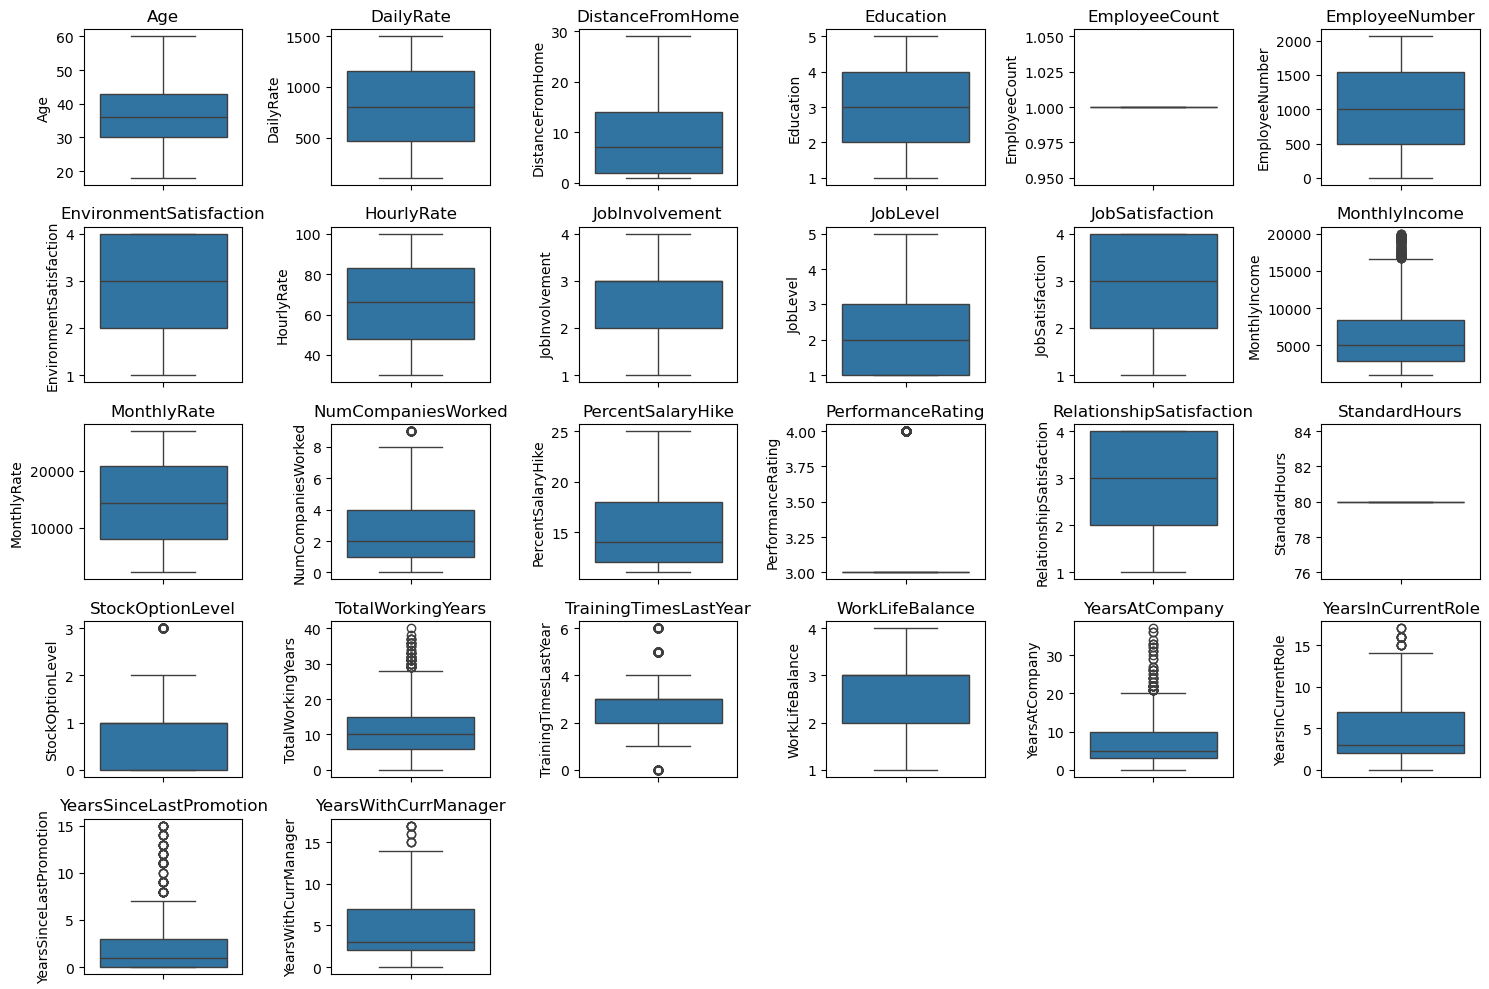

In [30]:
numerical_cols = X_train.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(y=X_train[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [31]:
# Handle Outliers
for col in numerical_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_train[col] = X_train[col].clip(lower=lower_bound, upper=upper_bound)

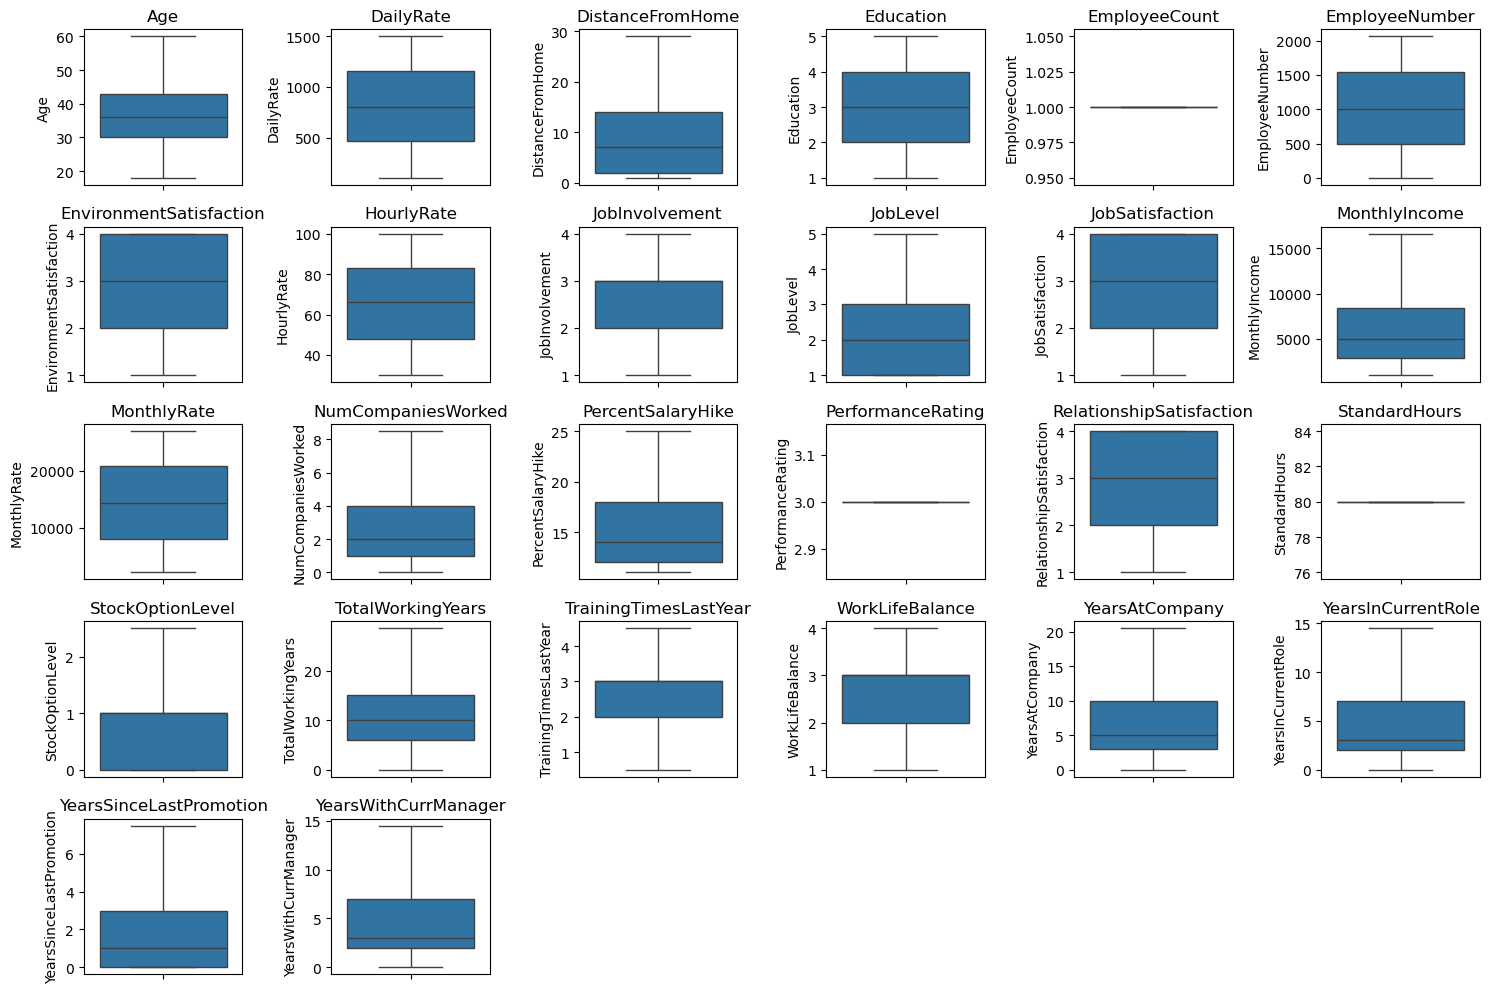

In [36]:
# Check after outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(y=X_train[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

### Transformasi (Erick)

#### *Log Transform*

#### *Standardize*

#### *Normalize*

### Encoding (Bila Perlu) (Erick)

### Preprocessing Pipeline (Perlu Discusi dengan Mentor)

### Imbalance Handling (Hanay data Train) (Erick)

## Modeling

### Library For Modeling

### Train (.fit) And Predict (.predict) Baseline Model

### Hyperparameter Tunning

### Final Model

## Model Evaluation

### Test the Prediction of Final Model

### Evaluation Metrics

### Visualitasion Actual vs Prediction (if needed)